In [1]:
__author__ = "Sandra Arcos Holzinger"
__copyright__ = "Copyright 2019, Sentiment Analysis"
__version__ = "1.0"
__email__ = "Sandra.ArcosHolzinger@thalesgroup.com.au"
__status__ = "Pre-Production"

# Packages 

In [2]:
from utils_LSTM import *
from metrics_LSTM import *
from metrics_predictions import *

1.13.1
2.2.4-tf
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 757937837845492478
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6626719826
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4163036480870453258
physical_device_desc: "device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


Using TensorFlow backend.


# 2 - Dataset and Pre-processing


**Columns to use:**

    airline.tsv [1,3]
	airline_tweets.csv [1,10]
	apple.csv [5,11]
	self_drive_cars.csv [5,10]
	brands_products.csv [1,2]
	all.csv [0,1]

### 2.1 Initialize parameters and pre-process data

In [3]:
# FILE_PATH = '/home/hummus/algorithms-other/data/airline_tweets.csv'
FILE_PATH = 'E:/Classification/algorithms-other/data/airline_tweets.csv'

DATASET = 'airline' #options: 'airline', 'products','apple','self-driving-cars', 'ied'
samples = -1 #number of samples to select from the dataset
cols = [1,10] #columns [1,3] or [1,10] to use from dataset (target and text columns)

max_features = 2000 #number of words to consider as features    
max_len = 32# Maximum sequence length-- used in Section 5 for predictions

#-----Pre-process and tokenize data into sequences-----# 
data, pos_sent_size, neg_sent_size, neut_sent_size = data_preprocess(samples, DATASET, FILE_PATH, cols, labels = True)
sequences,tokenizer = keras_tokenizer(data, max_features,'text', max_len)

print('Number of positive sentiments:', pos_sent_size)
print('Number of negative sentiments:', neg_sent_size)
print('Number of neutral sentiments:', neut_sent_size)
print('The dimensions of the matrix with all sequences is:', sequences.shape)
print('Sequence corresponding to a tweet:\n', sequences[0])
pd.set_option('max_colwidth', 100) #sets columns width in DataFrame
data.tail()

Number of positive sentiments: 2361
Number of negative sentiments: 9176
Number of neutral sentiments: 3098
The dimensions of the matrix with all sequences is: (11537, 32)
Sequence corresponding to a tweet:
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   37 1758   29    6    2  168   83  295  125   91
  187  194  142   15]


,target,text
14630,1,todays flight to philadelphia its a little disappointing for the unnecessary delays and its no...
14631,1,has made my no fly list other airlines wait when connector late flight stuck in iah
14632,1,flight 2646 four hours in the plane on the ground at bwi
14633,1,any idea on what the wait time is for refunds from i was told a few days over the phone but i...
14634,0,im looking forward to watching the oscars on my flight home tomorrow i might even get something...


# 3 - Split data into train and test sets

In [4]:
x = sequences # pre-processed data in the form of sequences from step 2
input_length =sequences.shape[1]
y = pd.get_dummies(data['target']).values #turn sentiments into 0 and 1 into a (11538,2) matrix
test_size=.10
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = test_size, random_state = 42) #random state to get same split output (42, 0, 21)
print('input dimensions:', x.shape, '|', 'output dimensions:', y.shape)
print('x_train dimensions:', x_train.shape, '|', 'y_train dimensions:', y_train.shape)
print('x_test dimensions:', x_test.shape, '|', 'y_test dimensions:', y_test.shape)

input dimensions: (11537, 32) | output dimensions: (11537, 2)
x_train dimensions: (10383, 32) | y_train dimensions: (10383, 2)
x_test dimensions: (1154, 32) | y_test dimensions: (1154, 2)


# 4 - LSTM Model Training and Validation

Hyperparameters: embedding dimensions, hidden units and batch size (embedding_dim, units, batch_size)

The number of parameters in the model are given by:

$$ p = 4*(nm + n^2 + n)$$ 

**where:**

m = number of embeddings per word

n = output dimension of the lstm

p = number of parameters in the LSTM model

### 4.1 Initialize model parameters

In [5]:
# #-----Initialize model parameters-----# 
# embedding_dim=400
# units=250 
# batch_size=32
# max_len = 30 # Cuts off texts after this many words (among the max_features most common words)-- used in Section 5 for predictions
# epochs = 12
# #-----Initialize k-fold splits-----# 
# splits = 4 #number of fold for cross-validation (used in Section 4.3)
#-----Initialize model parameters-----# 
embedding_dim=10000
units=300
batch_size=256
epochs = 4
#-----Initialize k-fold splits-----# 
splits = 10 #number of fold for cross-validation (used in Section 4.3)

### 4.2 Build and train model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 10000)         20000000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 32, 10000)         0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 300)               12362400  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 32,392,702
Trainable params: 32,392,702
Non-trainable params: 0
_________________________________________________________________
None
Train on 9344 samples, validate on 1039 samples
Epoch 1/4
 - 5s - loss: 0.4707 - acc: 0.8515 - val_loss: 0.3162 - val_acc: 0.

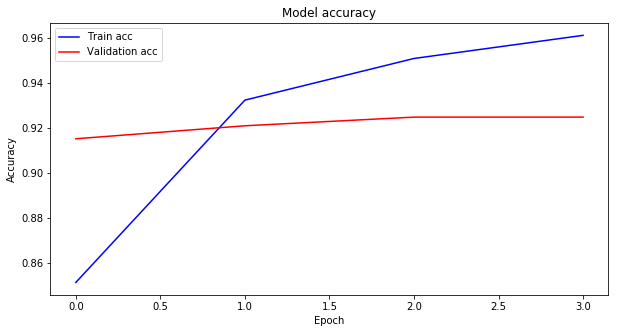

FileNotFoundError: [Errno 2] No such file or directory: '/home/hummus/algorithms-other/LSTM/figures/learning/learning_performance_airline_-1_batchsize256_maxlen32_epochs4.png'

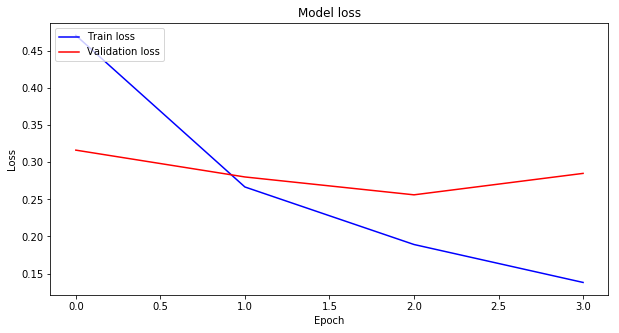

In [7]:
# np.random.seed(seed) # do not modify-used to get reproducible data analysis results

#-----Build LSTM model with Keras-----#      
keras_model = lstm_closure(embedding_dim, units, batch_size, max_features, input_length) #function that references create_lstm_model() in its enclosing scope
model = keras_model() # call to nested function in lstm_closure(...); returns Keras model
history = model.fit(x_train, y_train, validation_split=test_size, epochs=epochs, batch_size=batch_size, verbose=2)
min_epoch= plot_learning_performance(history, DATASET, samples, batch_size, max_len, epochs)
print("Minimum validation loss is reached in epoch {}".format(min_epoch))

### 4.3 k-Fold Cross-validation

In [10]:
#-----Perform cross-validation with Scikit Learn-----#    
classifier = KerasClassifier(build_fn= keras_model, epochs = epochs, batch_size=batch_size, verbose = 2)
scores = cross_validate(classifier, x_train, y_train, cv=splits, verbose =2)

[CV]  ................................................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 32, 10000)         20000000  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 32, 10000)         0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 300)               12362400  
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 32,392,702
Trainable params: 32,392,702
Non-trainable params: 0
_________________________________________________________________
None


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/4
 - 4s - loss: 0.4795 - acc: 0.8412
Epoch 2/4
 - 4s - loss: 0.2650 - acc: 0.9303
Epoch 3/4
 - 4s - loss: 0.1898 - acc: 0.9476
Epoch 4/4
 - 4s - loss: 0.1413 - acc: 0.9594
[CV] ................................................. , total=  15.9s
[CV]  ................................................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 10000)         20000000  
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 32, 10000)         0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 300)               12362400  
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)   

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.0s remaining:    0.0s


Epoch 1/4
 - 4s - loss: 0.4545 - acc: 0.8633
Epoch 2/4
 - 4s - loss: 0.2649 - acc: 0.9298
Epoch 3/4
 - 4s - loss: 0.1902 - acc: 0.9477
Epoch 4/4
 - 4s - loss: 0.1395 - acc: 0.9608
[CV] ................................................. , total=  16.0s
[CV]  ................................................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 32, 10000)         20000000  
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 32, 10000)         0         
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, 300)               12362400  
_________________________________________________________________
dense_6 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_7 (Dense)   

Epoch 1/4
 - 5s - loss: 0.4639 - acc: 0.8536
Epoch 2/4
 - 4s - loss: 0.2594 - acc: 0.9327
Epoch 3/4
 - 4s - loss: 0.1901 - acc: 0.9491
Epoch 4/4
 - 4s - loss: 0.1363 - acc: 0.9618
[CV] ................................................. , total=  16.8s
[CV]  ................................................................
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 32, 10000)         20000000  
_________________________________________________________________
spatial_dropout1d_10 (Spatia (None, 32, 10000)         0         
_________________________________________________________________
cu_dnnlstm_10 (CuDNNLSTM)    (None, 300)               12362400  
_________________________________________________________________
dense_20 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_21 (Dense)  

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.9min finished


In [11]:
print(scores)
# print(sorted(scores.keys())) 

#using K-fold Cross-validation  as a measure of model performance
print("(k-fold model performance, w/o optimisation) Accuracy = %0.4f , SD = +/- %0.4f" % (scores['test_score'].mean(), scores['test_score'].std() * 2))


{'fit_time': array([15.63430357, 15.7658484 , 15.72330427, 15.99265671, 16.10955334,
       16.06027389, 16.11552429, 16.43521762, 16.28664494, 16.56318951]), 'score_time': array([0.24787045, 0.27381516, 0.29502368, 0.3397994 , 0.37056661,
       0.39848733, 0.43276644, 0.47645783, 0.50714874, 0.54306364]), 'test_score': array([0.90760346, 0.93166506, 0.92877767, 0.91618497, 0.91618497,
       0.92100193, 0.89402697, 0.91040462, 0.92003854, 0.8911368 ]), 'train_score': array([0.98030822, 0.98052226, 0.98202055, 0.97731407, 0.98041734,
       0.98223649, 0.97314072, 0.97431782, 0.9835206 , 0.96918138])}
(k-fold model performance, w/o optimisation) Accuracy = 0.9137 , SD = +/- 0.0253


# 5 - Model Metrics


### 5.1 Run Metrics- using Keras predict and without cross validation

In [12]:
# %run metrics_LSTM.py

Classification accuracy for positive tweets 74.15254237288136 %
Classification accuracy for negative tweets 96.62309368191721 %


FileNotFoundError: [Errno 2] No such file or directory: '/home/hummus/algorithms-other/LSTM/figures/auc_roc/auc_roc_airline_-1_batchsize256_maxlen32_epochs4.png'

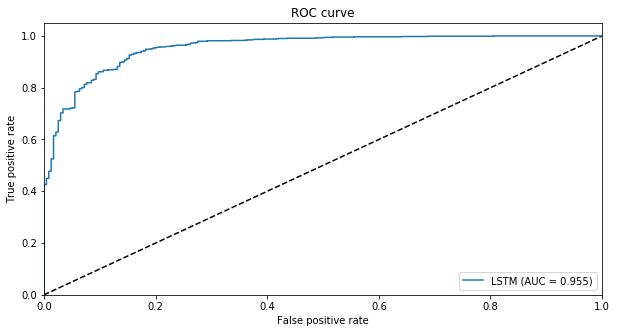

In [9]:
#-----Classification accuracy for positive and negative tweets-----#
pos_correct, pos_cnt, neg_correct, neg_cnt = accuracy_neg_pos(x_test, y_test, model, max_len)
print("Classification accuracy for positive tweets", pos_correct/pos_cnt*100, "%")
print("Classification accuracy for negative tweets", neg_correct/neg_cnt*100, "%")


# #-----k-fold validation accuracy scores-----#
# print('Test scores (k-fold):', scores['test_score'])
# print('Train scores (k-fold):', scores['train_score'])
# #using K-fold Cross-validation  as a measure of model performance
# print("(k-fold model performance, w/o optimisation) Accuracy = %0.4f , SD = +/- %0.4f" % (scores['test_score'].mean(), scores['test_score'].std() * 2))

#-----ROC/AUC-----#
auc_keras,fpr_keras,tpr_keras=auc_roc(x_test,y_test,model, max_len)
plot_LSTM=plot_auc_roc(auc_keras,fpr_keras,tpr_keras, DATASET, samples, batch_size, max_len,epochs)

#-----Confusion Matrix-----#
y_pred=keras_predict(x_test, 'all', model, max_len)
# classifier.fit(x_train, y_train)
# y_pred=classifier.predict_proba(x_test)
predicted = np.argmax(y_pred, axis =1)
actual = pd.Series(np.where(y_test!=0)[1]).values
# print('Confusion Matrix:')
# matrix=confusion_matrix(actual,predicted)
# print(matrix)
# plot_confusion_matrix(actual, predicted, classes=data.target.values,
#                       title='Confusion matrix, without normalization')
plot_confusion_matrix(actual, predicted, classes=data.target.values,normalize=True,
                      title='Normalized confusion matrix')

#-----Classification Report-----#
report=classification_report(actual, predicted, digits =3) 
print('Classification Report:')
print(report)

print('Cross entropy:', log_loss(y_test,y_pred, normalize=True))
print('Accuracy score:', accuracy_score(actual, predicted, normalize=True))




# plt.figure(1)
# plt.subplot(1,2,1)
# plt.imshow(plot_matrix)

# plt.subplot(1,2,2)
# plt.imshow(plot)
# plt.show()


### 5.2 Run Metrics- using scikit-learn predict and with cross validation

In [14]:
# %run metrics_LSTM.py

In [15]:
#-----Classification accuracy for positive and negative tweets-----#
classifier.fit(x_train, y_train)
predictions = classifier.predict_proba(x_test)#returns logits

pos_correct, pos_cnt, neg_correct, neg_cnt = accuracy_neg_pos_scikit(x_test, y_test,predictions)
print("Classification accuracy for positive tweets", pos_correct/pos_cnt*100, "%")
print("Classification accuracy for negative tweets", neg_correct/neg_cnt*100, "%")


# #-----k-fold validation accuracy scores-----#
# print('Test scores (k-fold):', scores['test_score'])
# print('Train scores (k-fold):', scores['train_score'])

#-----ROC/AUC-----#
# auc_keras,fpr_keras,tpr_keras=auc_roc(x_test,y_test,model, max_len)
# plot=plot_auc_roc(auc_keras,fpr_keras,tpr_keras, DATASET, samples, batch_size, max_len,epochs)

# #-----Confusion Matrix-----#
# # y_pred=keras_predict(x_test, 'all', model, max_len)
# classifier.fit(x_train, y_train)
# y_pred=classifier.predict_proba(x_test)
# predicted = np.argmax(y_pred, axis =1)
# actual = pd.Series(np.where(y_test!=0)[1]).values
# # print('Confusion Matrix:')
# # matrix=confusion_matrix(actual,predicted)
# # print(matrix)
# # plot_confusion_matrix(actual, predicted, classes=data.target.values,
# #                       title='Confusion matrix, without normalization')
# plot_confusion_matrix(actual, predicted, classes=data.target.values,normalize=True,
#                       title='Normalized confusion matrix')
# #-----Classification Report-----#
# report=classification_report(actual, predicted) 
# print('Classification Report:')
# print(report)

# print('Cross entropy:', log_loss(y_test,y_pred, normalize=True))
# print('Accuracy score:', accuracy_score(actual, predicted, normalize=True))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 32, 10000)         20000000  
_________________________________________________________________
spatial_dropout1d_11 (Spatia (None, 32, 10000)         0         
_________________________________________________________________
cu_dnnlstm_11 (CuDNNLSTM)    (None, 300)               12362400  
_________________________________________________________________
dense_22 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 202       
Total params: 32,392,702
Trainable params: 32,392,702
Non-trainable params: 0
_________________________________________________________________
None


/home/hummus/anaconda3/envs/tf_gpu/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/4
 - 6s - loss: 0.4851 - acc: 0.8325
Epoch 2/4
 - 4s - loss: 0.2730 - acc: 0.9294
Epoch 3/4
 - 4s - loss: 0.1927 - acc: 0.9482
Epoch 4/4
 - 4s - loss: 0.1398 - acc: 0.9602
Classification accuracy for positive tweets 79.23728813559322 %
Classification accuracy for negative tweets 95.31590413943356 %


In [16]:
# print(len(predictions))
# predicted_sent_index = np.argmax(predictions[x])
# print(predicted_sent_index)

# 6 - Display Predictions  ##

### 6.1 - Display predictions on  ***test set***

In [17]:
df = display_predictions(x_test, tokenizer, model,max_len)
qgrid_widget = qgrid.show_grid(df)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

### 6.2 Compare to expected labels

In [18]:

df_y_test=pd.DataFrame(actual,columns=['Labels'])
df_y_test['Labels'] = df_y_test['Labels'].apply(lambda x: 'negative' if x == 1 else 'positive')
print(df_y_test.shape)
# df_y_test.head(100)

(1154, 1)


In [19]:
df= df.set_index(df_y_test.index)
compare= pd.concat([df, df_y_test], axis =1)
compare.head()


,Sentiment Probabilities,Text,Sentiment Prediction,Labels
0,"[0.0010022541, 0.99899775]",terrible response how about someone up the phone and calling is now hours with no luggage,negative,negative
1,"[0.00014213975, 0.9998578]",asked her why needed to take tag off she said because i told you to expect a personal apology fr...,negative,negative
2,"[0.0006919486, 0.999308]",how can i speak to a human need 2 find bag delayed website and 800 are telling me 2 different th...,negative,negative
3,"[0.008559581, 0.9914404]",no first class passenger should have to pay for inflight wifi,negative,negative
4,"[0.08639281, 0.9136072]",your loyalty team basically me off via phone but thanks maybe loyalty and get back to me lol,negative,negative


### 6.2 Export predictions to csv file

In [20]:
#export as csv
compare.to_csv(f'/home/hummus/algorithms-other/LSTM/predictions/{DATASET}_{samples}_batchsize{batch_size}_maxlen{max_len}_epochs{epochs}.csv', index=False, header= True)

## 7 - Save and Load Model

#### 7.1 Set Filename to Save / Load Model

In [21]:
def set_filename_keras():
    path = '/home/hummus/algorithms-other/LSTM/saved_models/'
    now = datetime.now()
    file_name = f'{path}LSTM_keras_model_{DATASET.upper()}_{samples}_epochs{epochs}_batchsize{batch_size}_units{units}_maxlen{max_len}_emb{embedding_dim}_'
    file_name += str(now.strftime("%d%m%Y_%H-%M-%S"))
    file_name += ".h5"
    return file_name

def set_filename_parameters():
    path = '/home/hummus/algorithms-other/LSTM/saved_models/'
    now = datetime.now()
    file_name = f'{path}LSTM_parameters_{DATASET.upper()}_{samples}_epochs{epochs}_batchsize{batch_size}_units{units}_maxlen{max_len}_emb{embedding_dim}_'
    file_name += str(now.strftime("%d%m%Y_%H-%M-%S"))
    file_name += ".pkl"
    return file_name

#### 7.2 - Save Model ##

In [22]:
# save the parameters to disk using pickle
filename = set_filename_parameters()
with open(filename, 'wb') as f:
    pickle.dump([data, y, x_train, x_test, y_train, y_test, batch_size, tokenizer, max_features, max_len, samples,epochs, auc_keras,fpr_keras,tpr_keras, scores, splits, DATASET] , f)

# save the model to disk using keras/tf
filename = set_filename_keras()
model.save(filename)

#### 7.3 - Load Model ##

In [ ]:
# load the parameters from disk using pickle
# path_load = '/home/hummus/algorithms-other/LSTM/saved_models/'
path_load = '/home/hummus/algorithms-other/LSTM/saved_models/'
pkl_file ='LSTM_parameters_ALL_-1_epochs4_batchsize256_units300_maxlen32_emb10000_16052019_14-36-30.pkl'
with open (f'{path_load}{pkl_file}', 'rb') as f:
    data, y, x_train, x_test, y_train, y_test, batch_size, tokenizer, max_features, max_len, samples,epochs, auc_keras,fpr_keras,tpr_keras, scores,splits, DATASET = pickle.load(f)

# load the model from disk using keras/tf
h5_file= 'LSTM_keras_model_ALL_-1_epochs4_batchsize256_units300_maxlen32_emb10000_16052019_14-36-30.h5'
load_model = keras.models.load_model(f'{path_load}{h5_file}')
model = load_model

## 8 - Generalization ##

 Run trained model on unseen data.

### 8.1 Pre-process data ##

In [ ]:
FILE_PATH_G ='/home/hummus/algorithms-other/data/all/test.tsv' #'/home/hummus/algorithms-other/data/all/test.tsv' 
DATASET_G= 'all'
cols_g = [0,1,2] #columns to use from dataset (target and text columns)
labels = False
samples_g = -1 #read all data

# FILE_PATH_G = '/home/hummus/algorithms-other/data/airline_tweets.csv' # 'E:/algorithms-other/self_drive_cars.csv' 
# DATASET_G= 'airline'
# cols_g = [1,10] #columns to use from dataset (target and text columns)
# samples_g = -1 #read all data

#-----Pre-process and tokenize data into sequences-----#     
data_g, pos_sent_size_g, neg_sent_size_g, neut_sent_size_g = data_preprocess(samples_g, DATASET_G, FILE_PATH_G, cols_g, labels)
data_g = data_g.sort_values(by = 'id')
sequences_g,tokenizer_g = keras_tokenizer(data_g, max_features,'text', max_len)

if pos_sent_size_g or neg_sent_size_g or neut_sent_size_g != None:
    target_g = pd.get_dummies(data_g['target']).values #dummy/indicator variable
    
print('Number of positive sentiments:', pos_sent_size_g)
print('Number of negative sentiments:', neg_sent_size_g)
print('Number of neutral sentiments:', neut_sent_size_g)

# print(data_g.shape)
# print(sequences_g.shape)
# print(sequences.shape)

pd.set_option('max_colwidth', 200) #sets columns width in DataFrame
data_g.tail(10)


In [ ]:
text = tokenizer.sequences_to_texts(sequences_g)
text_df = pd.DataFrame()
text_df['text'] =text
text_df.tail()

### 8.2 Detect language and remove non-english text

In [ ]:
data_english_only=detect_language(data_g)
data_g.head()

### 8.3  Run trained model and predict sentiment on unseen data ##

In [ ]:
# #predict values on unlabelled data
# if pos_sent_size_g == None and neg_sent_size_g == None and neut_sent_size_g == None:

#     test_data = pd.read_csv('E:/algorithms-other/data/all/test.tsv', sep ='\t', header= None, names =['id','text','target']) # Keeping only the necessary columns
#     test_data = test_data.sort_values(by = 'id')

#     predictions_g=keras_predict(sequences_g,'all',model, max_len)
#     dataset = pd.DataFrame({'pos':predictions_g[:,0],'neg':predictions_g[:,1]})
#     probs= dataset[['pos','neg']]
#     probs['prediction'] = probs.idxmax(axis=1)
# #     probs['prediction'] = probs['sentiment'].apply(lambda x: 1 if x == 'neg' else 0)
#     # # display test labels as 'pos' and 'neg' instead of integers-- this is for display purposes only
#     sent_label = pd.DataFrame()
#     sent_label['target'] = test_data['target'].apply(lambda x: 'neg' if x == 1 else 'pos') 
#     df_g = pd.concat([data_g, probs, sent_label], axis =1)
#     target_g = pd.get_dummies(df_g['target']).values
    
   
    
# #predict values on labelled data
# else:
#     predictions_g=keras_predict(sequences_g,'all',model, max_len)
#     df_g = display_predictions(sequences_g, tokenizer_g, model, max_len)

# qgrid_widget_g = qgrid.show_grid(df_g)
# qgrid_widget_g
# pd.set_option('max_colwidth', 200) #sets columns width in DataFrame
# # df_g['id'].astype('int')
# test_data.tail()
# # df_g.tail()
# # df_g.info()

In [ ]:
#predict values on unlabelled data
if pos_sent_size_g == None and neg_sent_size_g == None and neut_sent_size_g == None:

#     test_data = pd.read_csv('E:/algorithms-other/data/all/test.tsv', sep ='\t', header= None, names =['id','text','target']) # Keeping only the necessary columns
#     test_data = test_data.sort_values(by = 'id')

    predictions_g=keras_predict(sequences_g,'all',model, max_len)
    dataset = pd.DataFrame({'pos':predictions_g[:,0],'neg':predictions_g[:,1]})
    probs= dataset[['pos','neg']]
    probs['prediction'] = probs.idxmax(axis=1)
#     probs['prediction'] = probs['sentiment'].apply(lambda x: 1 if x == 'neg' else 0)
    # # display test labels as 'pos' and 'neg' instead of integers-- this is for display purposes only
    sent_label = pd.DataFrame()
    sent_label['target'] = data_g['test_label'].apply(lambda x: 'neg' if x == 1 else 'pos') 
    df_g = pd.concat([data_g, probs, sent_label], axis =1)
    target_g = pd.get_dummies(df_g['target']).values
    
   
    
#predict values on labelled data
else:
    predictions_g=keras_predict(sequences_g,'all',model, max_len)
    df_g = display_predictions(sequences_g, tokenizer_g, model, max_len)

# qgrid_widget_g = qgrid.show_grid(df_g)
# qgrid_widget_g
pd.set_option('max_colwidth', 200) #sets columns width in DataFrame
# df_g['id'].astype('int')
df_g.tail()
# df_g.info()

In [ ]:
#-----Classification accuracy for positive and negative tweets-----#
pos_correct_g, pos_cnt_g, neg_correct_g, neg_cnt_g = accuracy_neg_pos_test(df_g)
print("Classification accuracy for positive tweets", pos_correct_g/pos_cnt_g*100, "%")
print("Classification accuracy for negative tweets", neg_correct_g/neg_cnt_g*100, "%")

#-----ROC/AUC-----#
auc_keras,fpr_keras,tpr_keras, actual_g, predicted_g=auc_roc_test(df_g)
plot=plot_auc_roc_test(auc_keras,fpr_keras,tpr_keras)

# #-----Confusion Matrix-----#
if pos_sent_size_g == None and neg_sent_size_g == None and neut_sent_size_g == None:
    classes = target_g
else:
    classes = data_g.target.values

matrix=plot_confusion_matrix_test(actual_g,predicted_g, classes=classes, normalize=True,
                                   title='Normalized confusion matrix')

# #-----Classification Report-----#
report=classification_report(actual_g, predicted_g) 
print('Classification Report (generalization):')
print(report)

In [ ]:
# #-----Classification accuracy for positive and negative tweets-----#
# pos_correct_g, pos_cnt_g, neg_correct_g, neg_cnt_g = accuracy_neg_pos(sequences_g, target_g, model, max_len)
# print("Classification accuracy for positive tweets", pos_correct_g/pos_cnt_g*100, "%")
# print("Classification accuracy for negative tweets", neg_correct_g/neg_cnt_g*100, "%")

# #-----ROC/AUC-----#
# auc_keras,fpr_keras,tpr_keras=auc_roc(sequences_g,target_g, model, max_len)
# plot=plot_auc_roc(auc_keras,fpr_keras,tpr_keras, DATASET_G, samples, batch_size, max_len)

# #-----Confusion Matrix-----#
# predicted_g = np.argmax(predictions_g, axis =1)
# actual_g = pd.Series(np.where(target_g!=0)[1]).values
# matrix=confusion_matrix(actual_g,predicted_g)


# if pos_sent_size_g == None and neg_sent_size_g == None and neut_sent_size_g == None:
#     classes = target_g
# else:
#     classes = data_g.target.values

# plot_confusion_matrix(actual_g, predicted_g, classes=classes,normalize=True,
#                       title='Normalized confusion matrix')

# #-----Classification Report-----#
# report=classification_report(actual_g, predicted_g) 
# print('Classification Report (generalization):')
# print(report)

### 8.4 Export predictions to csv file

In [ ]:
#export as csv
file_path_export = f'/home/hummus/algorithms-other/LSTM/predictions/'
now = datetime.now()
time_stamp = str(now.strftime("%d%m%Y_%H-%M-%S"))
df_g.to_csv(f'{file_path_export}gen_{DATASET_G}_{samples}_unit{units}_batchsize{batch_size}_maxlen{max_len}_epochs{epochs}_embeddings{embedding_dim}_{time_stamp}.csv', index=False, header= True)